In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv('/content/Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Weight_in_gms'>

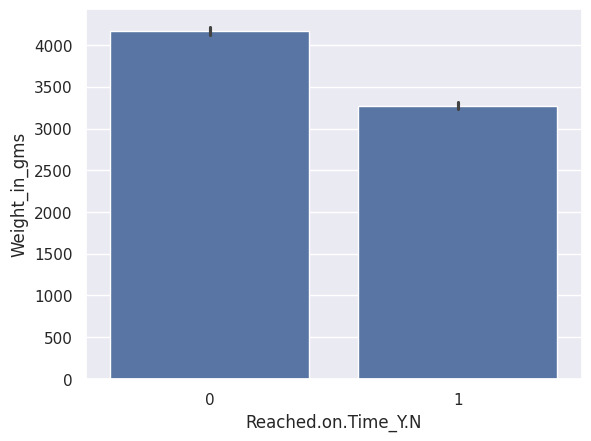

In [3]:
sns.barplot(data=df,x='Reached.on.Time_Y.N',y='Weight_in_gms')

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Discount_offered'>

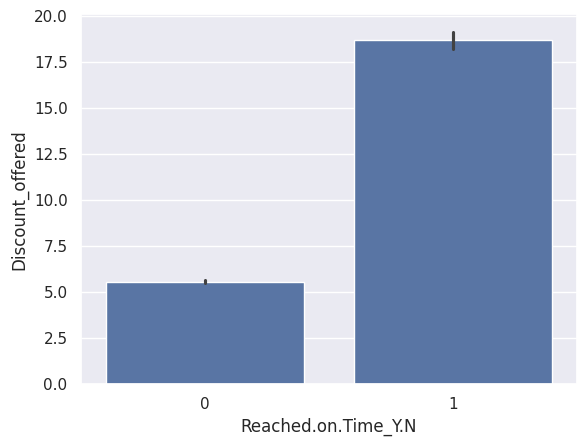

In [4]:
sns.barplot(data=df,x='Reached.on.Time_Y.N',y='Discount_offered')

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Cost_of_the_Product'>

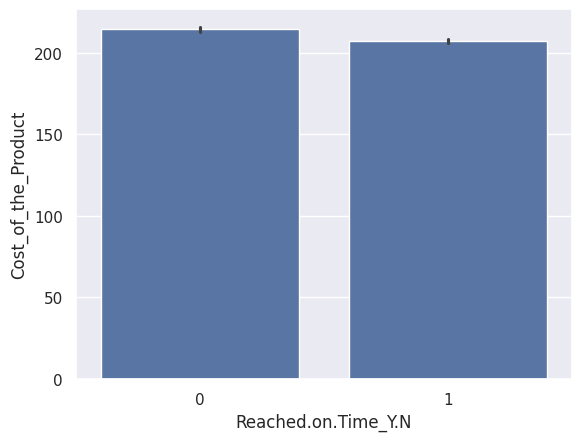

In [5]:
sns.barplot(data=df, x="Reached.on.Time_Y.N", y="Cost_of_the_Product")

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='count'>

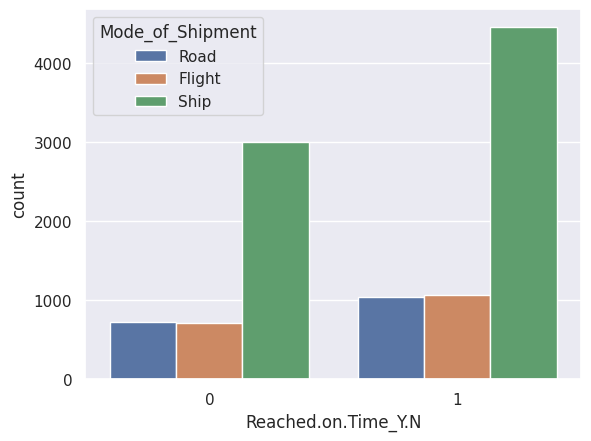

In [6]:
sns.countplot(data=df, x="Reached.on.Time_Y.N", hue="Mode_of_Shipment")

In [7]:
df['Warehouse_block'].unique()

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [8]:
df['Mode_of_Shipment'].unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

In [9]:
df['Product_importance'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [10]:
le = LabelEncoder()
df['Warehouse_block'] = le.fit_transform(df['Warehouse_block'])
df['Mode_of_Shipment'] = le.fit_transform(df['Mode_of_Shipment'])
df['Product_importance'] = le.fit_transform(df['Product_importance'])
df['Gender'] = le.fit_transform(df['Gender'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   10999 non-null  int64
 1   Warehouse_block      10999 non-null  int64
 2   Mode_of_Shipment     10999 non-null  int64
 3   Customer_care_calls  10999 non-null  int64
 4   Customer_rating      10999 non-null  int64
 5   Cost_of_the_Product  10999 non-null  int64
 6   Prior_purchases      10999 non-null  int64
 7   Product_importance   10999 non-null  int64
 8   Gender               10999 non-null  int64
 9   Discount_offered     10999 non-null  int64
 10  Weight_in_gms        10999 non-null  int64
 11  Reached.on.Time_Y.N  10999 non-null  int64
dtypes: int64(12)
memory usage: 1.0 MB


<Axes: xlabel='Cost_of_the_Product'>

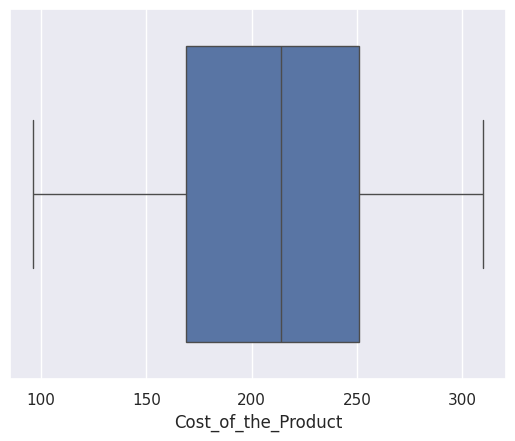

In [12]:
sns.boxplot(x=df["Cost_of_the_Product"])

<Axes: xlabel='Discount_offered'>

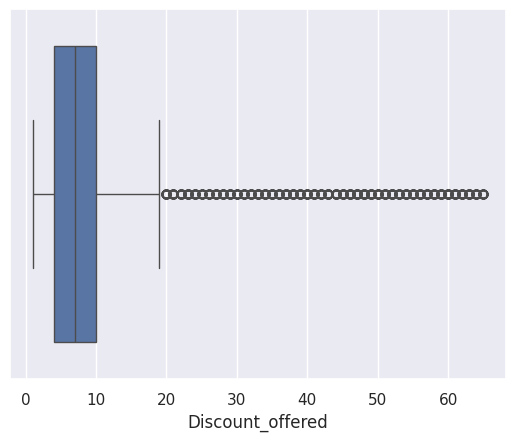

In [13]:
sns.boxplot(x=df["Discount_offered"])

<Axes: xlabel='Weight_in_gms'>

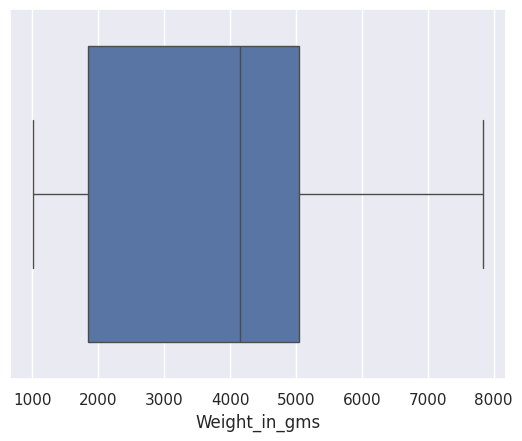

In [14]:
sns.boxplot(x=df["Weight_in_gms"])

In [15]:
import scipy.stats as sts
z = np.abs(sts.zscore(df))
dc = df[(z<3).all(axis=1)]
dc.shape

(10642, 12)

,count
Reached.on.Time_Y.N,
1,6282
0,4360


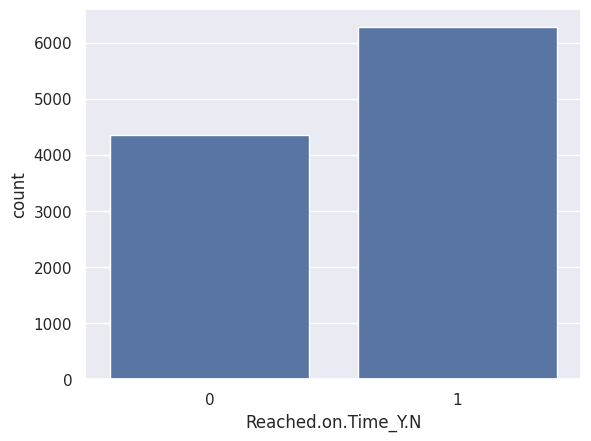

In [16]:
sns.countplot(data=dc, x='Reached.on.Time_Y.N')
dc['Reached.on.Time_Y.N'].value_counts()

In [17]:
from sklearn.utils import resample

df_maj = dc[(dc['Reached.on.Time_Y.N']==1)]
df_mino = dc[(dc['Reached.on.Time_Y.N']==0)]

df_min_ups = resample(df_mino, replace=True, n_samples=len(df_maj), random_state=42)

df_upsampled = pd.concat([df_min_ups,df_maj])

,count
Reached.on.Time_Y.N,
0,6282
1,6282


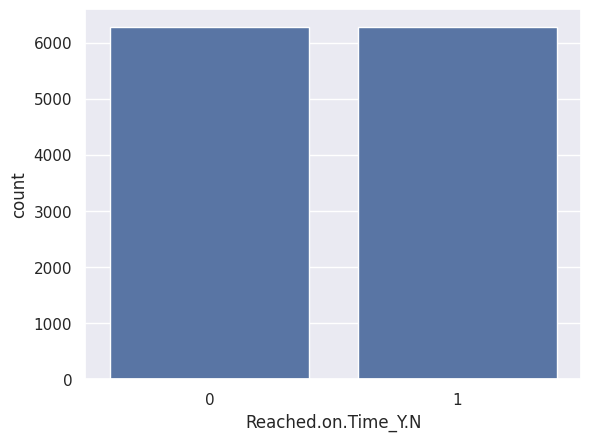

In [18]:
sns.countplot(data=df_upsampled, x='Reached.on.Time_Y.N')
df_upsampled['Reached.on.Time_Y.N'].value_counts()

<Axes: >

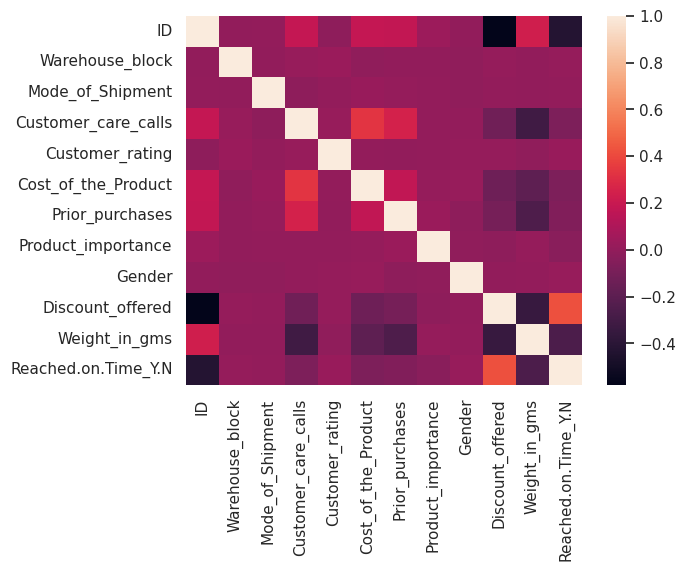

In [19]:
sns.heatmap(df_upsampled.corr(),fmt='.2g')

In [22]:
x = df_upsampled.drop('Reached.on.Time_Y.N',axis=1)
y = df_upsampled['Reached.on.Time_Y.N']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)
print("Accuracy Score:", round(accuracy_score(y_test,y_pred)*100,2))

Accuracy Score: 79.75


In [24]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)
print("Accuracy Score:", round(accuracy_score(y_test,y_pred)*100,2))

Accuracy Score: 75.69


In [26]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
print("Accuracy Score:", round(accuracy_score(y_test,y_pred)*100,2))

Accuracy Score: 70.47
